In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = pd.read_csv("C:/Users/Kailash Patel/Downloads/Dataset/CarPrice.csv")
data.head()

C:\Users\Kailash Patel\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
data["enginesize_m"] = (data["enginesize"]-data["enginesize"].mean())
data["peakrpm_m"] = (data["peakrpm"]-data["peakrpm"].mean())
data["horsepower"] = (data["horsepower"]-data["horsepower"].mean())
data["stroke"] = (data["horsepower"]-data["horsepower"].mean())


In [3]:
data["enginesize_m"]=data["enginesize_m"].abs()
data["peakrpm_m"]=data["peakrpm_m"].abs()
data["horsepower"] = data["horsepower"].abs()
data["stroke"] = data["horsepower"].abs()

In [4]:
data["carbody"] = data["carbody"].map({"convertible":0, "sedan":1, "wagon":2, "hatchback":3, "hardtop":4})

In [5]:
data["carbody"].value_counts()

1    96
3    70
2    25
4     8
0     6
Name: carbody, dtype: int64

In [7]:
a=data['price'].mean()
data['isHigh'] = data.apply(lambda row: 1 if(row.price>=a) else 0, axis=1)

In [8]:
print(data['isHigh'])

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
175    0
176    0
177    0
178    1
179    1
180    1
181    1
182    0
183    0
184    0
185    0
186    0
187    0
188    0
189    0
190    0
191    1
192    1
193    0
194    0
195    1
196    1
197    1
198    1
199    1
200    1
201    1
202    1
203    1
204    1
Name: isHigh, Length: 205, dtype: int64


In [12]:
reg1=smf.ols('price ~ horsepower + stroke + carbody', data=data).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     36.47
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           3.01e-14
Time:                        11:28:28   Log-Likelihood:                -2100.9
No. Observations:                 205   AIC:                             4208.
Df Residuals:                     202   BIC:                             4218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.171e+04   1108.176     10.570      0.0

AttributeError: module 'matplotlib' has no attribute 'xlabel'

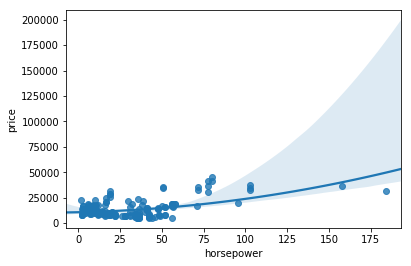

In [14]:
import seaborn 
import matplotlib as plt
scat1=seaborn.regplot(x="horsepower", y="price", scatter=True, order=2, data=data)
plt.xlabel("Engine Size")
plt.ylable("Car Price")

In [15]:
reg1=smf.ols('price ~ horsepower + carbody', data=data).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     36.47
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           3.01e-14
Time:                        11:31:44   Log-Likelihood:                -2100.9
No. Observations:                 205   AIC:                             4208.
Df Residuals:                     202   BIC:                             4218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.171e+04   1108.176     10.570      0.0

In [17]:
reg3=smf.ols('price ~ enginesize_m + I(horsepower**2)', data=data).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     70.55
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           5.80e-24
Time:                        11:32:57   Log-Likelihood:                -2078.2
No. Observations:                 205   AIC:                             4162.
Df Residuals:                     202   BIC:                             4172.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           8316.3813    631

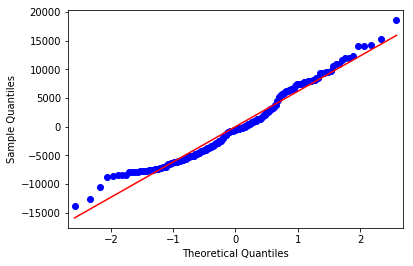

In [18]:
fig1=sm.qqplot(reg3.resid, line='r')

AttributeError: 'list' object has no attribute 'axhline'

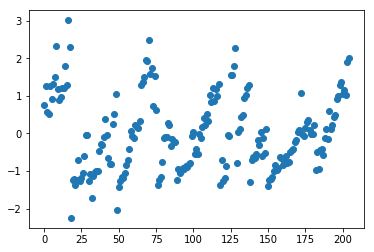

In [19]:
import matplotlib.pyplot as plt
stdres=pd.DataFrame(reg3.resid_pearson)
fig2=plt.plot(stdres, 'o', ls='None')
l = fig2.axhline(y=0, color='r')
plt.xlabel('Observation Number')
plt.ylabel('Standardized residual')
print(fig2)

In [20]:

fig3=plt.figure(figsize=(20,8))
fig3 = sm.graphics.plot_regress_exog(reg3, 'price', fig=fig3)

ValueError: 'price' is not in list

Figure(432x288)


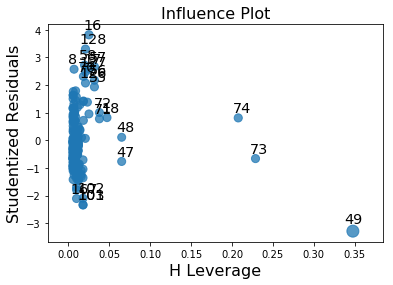

In [47]:
fig4 = sm.graphics.influence_plot(reg3, size=12)
print(fig4)

In [12]:
lreg1=smf.logit(formula = 'isHigh ~ enginesize_m', data=data).fit()
print(lreg1.summary2())

Optimization terminated successfully.
         Current function value: 0.616136
         Iterations 6
                        Results: Logit
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: isHigh           Pseudo R-squared: 0.066   
Date:               2020-10-02 18:22 AIC:              256.6158
No. Observations:   205              BIC:              263.2619
Df Model:           1                Log-Likelihood:   -126.31 
Df Residuals:       203              LL-Null:          -135.17 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       -1.2960   0.2593 -4.9971 0.0000 -1.8043 -0.7877
enginesize_m     0.0255   0.0073  3.4957 0.0005  0.0112  0.0397



In [18]:
print('Odds Ratio')
print(np.exp(lreg1.params))

Odds Ratio
Intercept       0.273628
enginesize_m    1.025791
dtype: float64


In [21]:
params = lreg1.params
conf = lreg1.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print(np.exp(conf))

              Lower CI  Upper CI        OR
Intercept     0.164591  0.454900  0.273628
enginesize_m  1.011250  1.040542  1.025791


In [25]:
lreg2=smf.logit(formula = 'isHigh ~ enginesize_m + peakrpm_m', data=data).fit()
print(lreg2.summary2())

Optimization terminated successfully.
         Current function value: 0.616036
         Iterations 6
                        Results: Logit
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: isHigh           Pseudo R-squared: 0.066   
Date:               2020-10-02 19:01 AIC:              258.5747
No. Observations:   205              BIC:              268.5437
Df Model:           2                Log-Likelihood:   -126.29 
Df Residuals:       202              LL-Null:          -135.17 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept       -1.3323   0.3154 -4.2237 0.0000 -1.9505 -0.7141
enginesize_m     0.0253   0.0073  3.4545 0.0006  0.0109  0.0396
peakrpm_m        0.0001   0.0005  0.2031 0.8391 -0.0009  0.0011

